In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Butz Algorithm
m = 2
n = 3
N = n * m

assert (N <= 64)

def calc_p(r):
    t = [0] * N
    for i in range(len(t)):
        t[i] = r[i]
    return t

def calc_J(p):
    J = []
    for i in range(m):
        ans = n
        nth = p[i*n + n - 1]
        for j in range(n-1, -1, -1):
            if p[i*n + j] != nth:
                ans = j + 1
                break
        J.append(ans)
    return J

def calc_sigma(p):
    sig = []
    for i in range(m):
        p_int = bin_to_dec(p[i*n: i*n+n])
        sig_t = dec_to_bin(p_int ^ (p_int>>1), n)
        sig += sig_t
    return sig
#     sig = []
#     for i in range(m):
#         t = 0
#         for j in range(n):
#             sig.append(t ^ p[i*n + j])
#             t = p[i*n + j] 
#     return sig

def calc_tau(sigma, J):
    tau = []
    for i in range(m):
        for j in range(n):
            tau.append(sigma[i*n + j])
        tau[-1] = 1 - tau[-1]
        
        parity = 0
        
        for j in range(n):
            parity += tau[i*n + j]
        
        if parity %2 == 1:
            tau[i*n + J[i] - 1] = 1 - tau[i*n + J[i] - 1]
    return tau
        
def calc_sigma2(sigma, J):
    sigma_2 = []
    shift = 0
    for i in range(m):
        for j in range(n):
            sigma_2.append(sigma[i*n + ((j - shift)%n)])
        shift += (J[i] - 1)
    return sigma_2

def calc_tau2(tau, J):
    tau_2 = []
    shift = 0
    for i in range(m):
        for j in range(n):
            tau_2.append(tau[i*n + ((j - shift)%n)])
        shift += (J[i] - 1)
    return tau_2

def calc_omega(tau2):
    omega = [0] * n
    for i in range(m-1):
        for j in range(n):
            omega.append(omega[i*n + j] ^ tau2[i*n + j])
    return omega

def calc_alpha(omega, sigma2):
    alpha = []
    for i in range(m):
        for j in range(n):
            alpha.append(omega[i*n + j] ^ sigma2[i*n + j])
    return alpha

def split_alpha(alpha):
    split = []
    for i in range(n):
        t = []
        for j in range(m):
            t.append(alpha[n * j + i]) # 0,3,6,9; 1,4,7,10; 2,5,8,11
        split.append(t)
    return split

def dec_to_bin(value, bitsize):
    b = []
    for i in range(bitsize-1, -1, -1):
        b.append((value & (1 << i))>>i)
    return b

def bin_to_dec(value):
    v = 0
    nb = len(value)
    for i in range(nb):
        v += value[i]<<(nb - 1 - i)
    return v

def decode(r):
    p = r #calc_p(r)
    J = calc_J(p)
    sigma = calc_sigma(p)
    tau = calc_tau(sigma, J)
    sigma2 = calc_sigma2(sigma, J)
    tau2 = calc_tau2(tau, J)
    omega = calc_omega(tau2)
    alpha = calc_alpha(omega, sigma2)
#     print(alpha)
    split = split_alpha(alpha)
    return split

def decode_readable(r):
    dec = decode(r)
    readable = []
    for i in dec:
        readable.append(bin_to_dec(i))
    return readable
    
# for i in range(1<<17):
#     assert (bin_to_dec(dec_to_bin(i, 17)) == i)

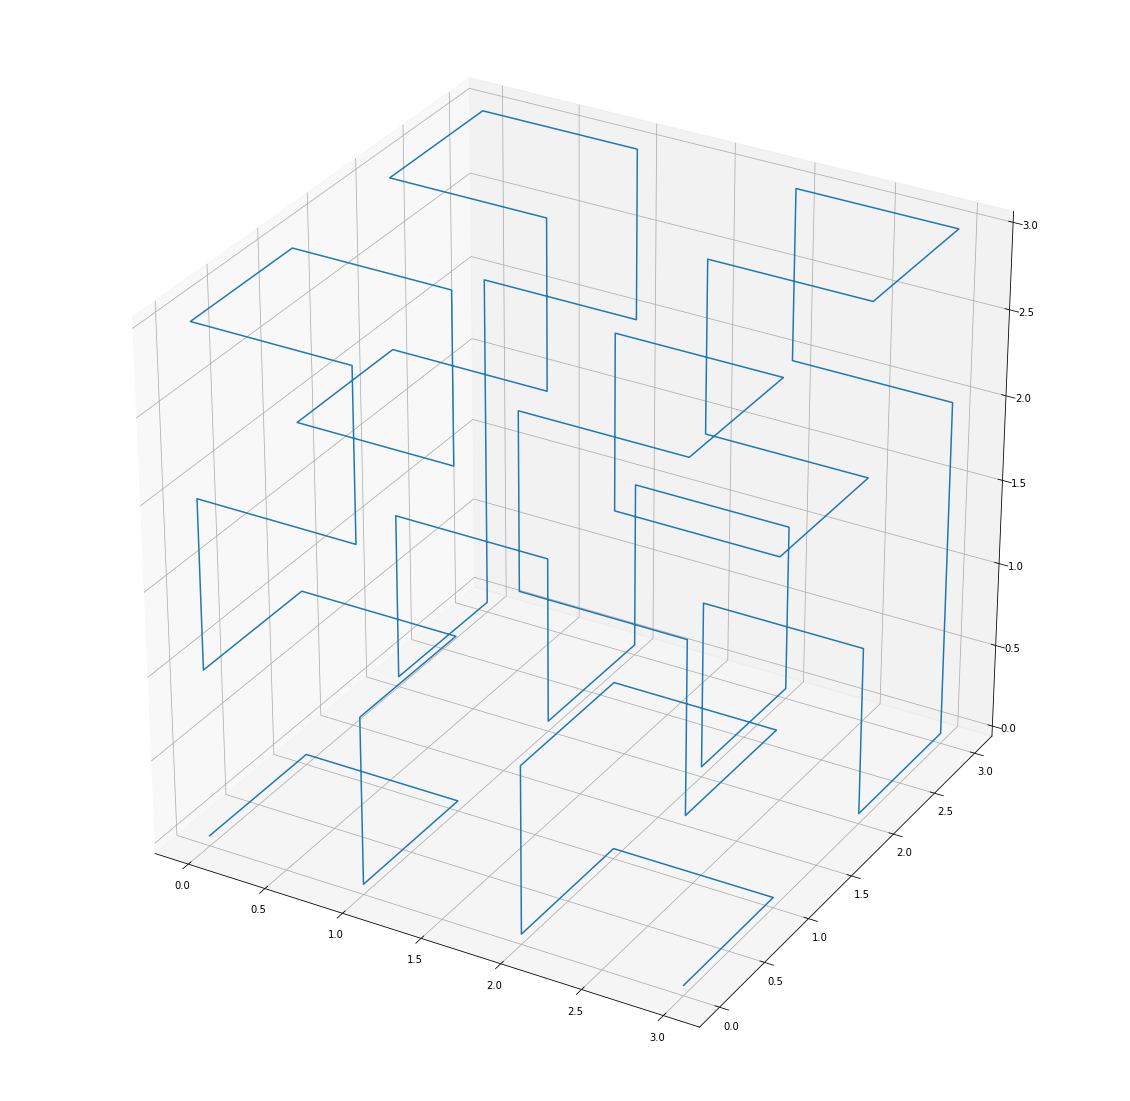

In [79]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection = '3d')

xs = []
ys = []
zs = []
coords = []
for i in range(1<<N):
    t = decode_readable(dec_to_bin(i, N))
    xs.append(t[0])
    ys.append(t[1])
    zs.append(t[2])
    coords.append(tuple(t))

ax.plot(xs, ys, zs)
# region_size = 1<<(N-8)
# for i in range(1<<8):
#     b = i*region_size
#     e = (i+1) * region_size
#     ax.plot(xs[b:e], ys[b:e], zs[b:e], color=plt.cm.rainbow(i))
plt.show()

In [73]:
for i in range(1, len(coords)):
    diff = abs(np.asarray(list(coords[i-1]) - np.asarray(list(coords[i]))))
    assert(np.count_nonzero(diff) == 1 and np.sum(diff) == 1)
#         print(i)
#         print(coords[i-1])
#         print(coords[i])

In [61]:
coords = []
for i in range(1<<N):
    coords.append(tuple(decode_readable(dec_to_bin(i, N))))

In [ ]:
p = calc_p(r)
p

In [ ]:
J = calc_J(p)
J

In [ ]:
sigma = calc_sigma(p)
sigma

In [ ]:
tau = calc_tau(sigma, J)
tau

In [ ]:
sigma2 = calc_sigma2(sigma, J)
sigma2

In [ ]:
tau2 = calc_tau2(tau, J)
tau2

In [ ]:
omega = calc_omega(tau2)
omega

In [ ]:
alpha = calc_alpha(omega, sigma2)
alpha

In [ ]:
split = split_alpha(alpha)
split